In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# import the necessary packages
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Activation
from keras.optimizers import SGD
from keras.layers import Dense
from keras.utils import np_utils
from imutils import paths
import numpy as np
import argparse
import cv2
import os

In [0]:
def image_to_feature_vector(image, size=(32, 32)):
	# resize the image to a fixed size, then flatten the image into
	# a list of raw pixel intensities
	return cv2.resize(image, size).flatten()

In [21]:
# grab the list of images that we'll be describing
print("[INFO] describing images...")
imagePaths = list(paths.list_images('/content/gdrive/My Drive/app/ASimpleNeuralNetwork/kaggle_dogs_vs_cats'))
# initialize the data matrix and labels list
data = []
labels = []
print(imagePaths)
# # loop over the input images
for (i, imagePath) in enumerate(imagePaths):
	# load the image and extract the class label (assuming that our
	# path as the format: /path/to/dataset/{class}.{image_num}.jpg
	image = cv2.imread(imagePath)
	label = imagePath.split(os.path.sep)[-1].split(".")[0]

	# construct a feature vector raw pixel intensities, then update
	# the data matrix and labels list
	features = image_to_feature_vector(image)
	data.append(features)
	labels.append(label)

	# show an update every 1,000 images
	if i > 0 and i % 1000 == 0:
		print("[INFO] processed {}/{}".format(i, len(imagePaths)))
    
# encode the labels, converting them from strings to integers
le = LabelEncoder()
labels = le.fit_transform(labels)

# scale the input image pixels to the range [0, 1], then transform
# the labels into vectors in the range [0, num_classes] -- this
# generates a vector for each label where the index of the label
# is set to `1` and all other entries to `0`
data = np.array(data) / 255.0
labels = np_utils.to_categorical(labels, 2)

# partition the data into training and testing splits, using 75%
# of the data for training and the remaining 25% for testing
print("[INFO] constructing training/testing split...")
(trainData, testData, trainLabels, testLabels) = train_test_split(
	data, labels, test_size=0.25, random_state=42)

Output hidden; open in https://colab.research.google.com to view.

In [0]:
import pickle

In [0]:
with open('/content/gdrive/My Drive/app/ASimpleNeuralNetwork/trainData.pkl', "wb") as f:
    pickle.dump(trainData, f)

In [0]:
with open('/content/gdrive/My Drive/app/ASimpleNeuralNetwork/testData.pkl', "wb") as f:
    pickle.dump(testData, f)

In [0]:
with open('/content/gdrive/My Drive/app/ASimpleNeuralNetwork/trainLabels.pkl', "wb") as f:
    pickle.dump(trainLabels, f)

In [0]:
with open('/content/gdrive/My Drive/app/ASimpleNeuralNetwork/testLabels.pkl', "wb") as f:
    pickle.dump(testLabels, f)

In [30]:
# define the architecture of the network
model = Sequential()
model.add(Dense(768, input_dim=3072, init="uniform",
	activation="relu"))
model.add(Dense(384, activation="relu", kernel_initializer="uniform"))
model.add(Dense(2))
model.add(Activation("softmax"))

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(768, input_dim=3072, activation="relu", kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until


In [38]:
# train the model using SGD
print("[INFO] compiling model...")
sgd = SGD(lr=0.01)
model.compile(loss="binary_crossentropy", optimizer=sgd,
	metrics=["accuracy"])
model.fit(trainData, trainLabels, epochs=100, batch_size=128,
	verbose=1)

[INFO] compiling model...
Epoch 1/100
18750/18750 [==============================] - 1s 59us/step - loss: 0.4737 - acc: 0.7812
Epoch 2/100
18750/18750 [==============================] - 1s 45us/step - loss: 0.4749 - acc: 0.7776
Epoch 3/100
18750/18750 [==============================] - 1s 44us/step - loss: 0.4713 - acc: 0.7810
Epoch 4/100
18750/18750 [==============================] - 1s 45us/step - loss: 0.4632 - acc: 0.7852
Epoch 5/100
18750/18750 [==============================] - 1s 45us/step - loss: 0.4597 - acc: 0.7884
Epoch 6/100
18750/18750 [==============================] - 1s 45us/step - loss: 0.4599 - acc: 0.7879
Epoch 7/100
18750/18750 [==============================] - 1s 45us/step - loss: 0.4502 - acc: 0.7934
Epoch 8/100
18750/18750 [==============================] - 1s 45us/step - loss: 0.4495 - acc: 0.7935
Epoch 9/100
18750/18750 [==============================] - 1s 44us/step - loss: 0.4520 - acc: 0.7916
Epoch 10/100
18750/18750 [==============================] - 1s 44

In [39]:
# show the accuracy on the testing set
print("[INFO] evaluating on testing set...")
(loss, accuracy) = model.evaluate(testData, testLabels,
	batch_size=128, verbose=1)
print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,
	accuracy * 100))

[INFO] evaluating on testing set...
6250/6250 [==============================] - 0s 43us/step
[INFO] loss=0.8069, accuracy: 68.6240%


In [40]:
# dump the network architecture and weights to file
print("[INFO] dumping architecture and weights to file...")
model.save('/content/gdrive/My Drive/app/ASimpleNeuralNetwork/simple_neural_network.hdf5')

[INFO] dumping architecture and weights to file...


In [34]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 768)               2360064   
_________________________________________________________________
dense_2 (Dense)              (None, 384)               295296    
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 770       
_________________________________________________________________
activation_1 (Activation)    (None, 2)                 0         
Total params: 2,656,130
Trainable params: 2,656,130
Non-trainable params: 0
_________________________________________________________________


In [47]:
import matplotlib.pyplot as plt
from keras.models import load_model



# initialize the class labels for the Kaggle dogs vs cats dataset
CLASSES = ["cat", "dog"]

# load the network
print("[INFO] loading network architecture and weights...")
model = load_model('/content/gdrive/My Drive/app/ASimpleNeuralNetwork/simple_neural_network.hdf5')
# load the image, resize it to a fixed 32 x 32 pixels (ignoring 	# aspect ratio), and then extract features from it


def test(image):
  features = image_to_feature_vector(image) / 255.0
  features = np.array([features])

  # classify the image using our extracted features and pre-trained	# neural network
  probs = model.predict(features)[0]
  prediction = probs.argmax(axis=0)

  label = "{}: {:.2f}%".format(CLASSES[prediction],	probs[prediction] * 100)

  cv2.putText(image, label, (10, 35), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 0), 3)

  plt.imshow(image)

[INFO] loading network architecture and weights...


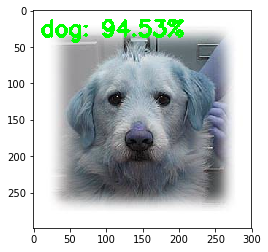

In [49]:
image = cv2.imread('/content/gdrive/My Drive/app/ASimpleNeuralNetwork/test_images/3.jpg')
test(image)

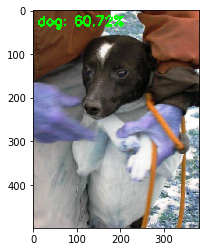

In [50]:
image = cv2.imread('/content/gdrive/My Drive/app/ASimpleNeuralNetwork/test_images/1.jpg')
test(image)

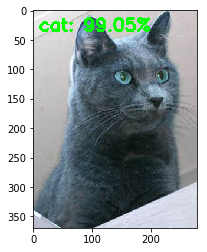

In [52]:
image = cv2.imread('/content/gdrive/My Drive/app/ASimpleNeuralNetwork/test_images/11.jpg')
test(image)

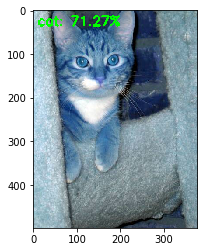

In [53]:
image = cv2.imread('/content/gdrive/My Drive/app/ASimpleNeuralNetwork/test_images/15.jpg')
test(image)

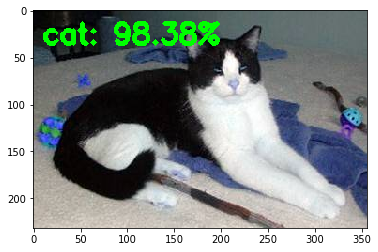

In [54]:
image = cv2.imread('/content/gdrive/My Drive/app/ASimpleNeuralNetwork/test_images/20.jpg')
test(image)

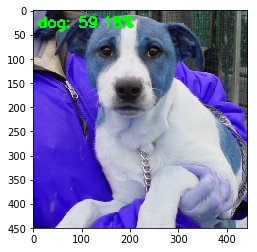

In [60]:
image = cv2.imread('/content/gdrive/My Drive/app/ASimpleNeuralNetwork/test_images/21.jpg')
test(image)

In [0]:
with open('/content/gdrive/My Drive/app/ASimpleNeuralNetwork/trainData.pkl', 'rb') as f:
    trainData1 = pickle.load(f)

In [0]:
with open('/content/gdrive/My Drive/app/ASimpleNeuralNetwork/testData.pkl', 'rb') as f:
     testData1 = pickle.load(f)

In [0]:
with open('/content/gdrive/My Drive/app/ASimpleNeuralNetwork/trainLabels.pkl', 'rb') as f:
     trainLabels1 = pickle.load(f)

In [0]:
with open('/content/gdrive/My Drive/app/ASimpleNeuralNetwork/testLabels.pkl', 'rb') as f:
     testLabels1 = pickle.load(f)

In [66]:
# train the model using SGD
print("[INFO] compiling model...")
sgd = SGD(lr=0.01)
model.compile(loss="binary_crossentropy", optimizer=sgd,
	metrics=["accuracy"])
model.fit(trainData1, trainLabels1, epochs=100, batch_size=128,
	verbose=1)

[INFO] compiling model...
Epoch 1/100
18750/18750 [==============================] - 1s 67us/step - loss: 0.1687 - acc: 0.9506
Epoch 2/100
18750/18750 [==============================] - 1s 41us/step - loss: 0.1507 - acc: 0.9602
Epoch 3/100
18750/18750 [==============================] - 1s 40us/step - loss: 0.1215 - acc: 0.9702
Epoch 4/100
18750/18750 [==============================] - 1s 41us/step - loss: 0.0978 - acc: 0.9783
Epoch 5/100
18750/18750 [==============================] - 1s 40us/step - loss: 0.1786 - acc: 0.9560
Epoch 6/100
18750/18750 [==============================] - 1s 40us/step - loss: 0.1567 - acc: 0.9646
Epoch 7/100
18750/18750 [==============================] - 1s 39us/step - loss: 0.1368 - acc: 0.9660
Epoch 8/100
18750/18750 [==============================] - 1s 40us/step - loss: 0.1245 - acc: 0.9737
Epoch 9/100
18750/18750 [==============================] - 1s 40us/step - loss: 0.1583 - acc: 0.9613
Epoch 10/100
18750/18750 [==============================] - 1s 40

In [67]:
# show the accuracy on the testing set
print("[INFO] evaluating on testing set...")
(loss, accuracy) = model.evaluate(testData1, testLabels1,
	batch_size=128, verbose=1)
print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,
	accuracy * 100))

[INFO] evaluating on testing set...
6250/6250 [==============================] - 0s 53us/step
[INFO] loss=1.1612, accuracy: 68.6080%


In [68]:
# dump the network architecture and weights to file
print("[INFO] dumping architecture and weights to file...")
model.save('/content/gdrive/My Drive/app/ASimpleNeuralNetwork/simple_neural_network_pkl.hdf5')

[INFO] dumping architecture and weights to file...
